In [1]:
import scipy.io as sio
from numpy.random import permutation
import numpy as np
import matplotlib.pyplot as plt

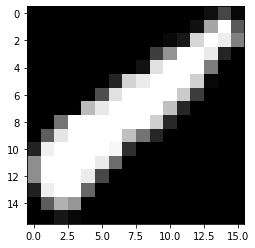

In [28]:
def to_onehot(label):
    m = len(set(label))
    n = len(label)
    onehot_matrix = np.zeros([n, m])
    for i in range(n):
        onehot_matrix[i, label[i]] = 1
    return onehot_matrix


def load_USPS_data_instace(path, sample_per_class):
    data = sio.loadmat(path)
    img = data['data']
    img_data = []
    label = []
    for i in range(img.shape[-1]):
        temp_sample_list = []
        for j in range(img.shape[1]):
            temp = np.reshape(img[:, j, i], [16, 16])
            temp_sample_list.append(temp)

        idx = permutation(len(temp_sample_list))
        idx = idx[:sample_per_class]
        selected_samples = [temp_sample_list[x] for x in idx]
        selected_labels = [i for _ in idx]
        img_data.extend(selected_samples)
        label.extend(selected_labels)

    img_data = np.array(img_data)
    img_data = img_data.astype('float')
    label = np.array(label[:])
    label2 = to_onehot(label)
    return img_data, label2,label


images, labels ,labels_2= load_USPS_data_instace("dataset/usps_all.mat", 100)

plt.imshow(images[77],cmap="gray")
plt.show()
images = np.reshape(images, [images.shape[0], -1])



In [43]:
from sklearn.neighbors import kneighbors_graph
A = kneighbors_graph(images, 10, mode='distance', include_self=True)
A = A.toarray()
print(A.shape)
sum_od_distances =sum(sum(A))

delta = 1/3 * (sum_od_distances/10*10)
mask=A!=0

W=np.exp(np.power(A,2)/(2*np.power(delta,2)))


(1000, 1000)


In [44]:
D = np.zeros(W.shape)
for i in range(W.shape[1]):
    D[i][i]= 10
print(D)

[[10.  0.  0. ...  0.  0.  0.]
 [ 0. 10.  0. ...  0.  0.  0.]
 [ 0.  0. 10. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ...  0. 10.  0.]
 [ 0.  0.  0. ...  0.  0. 10.]]


In [45]:
L = D-W

In [56]:
persentage = 0.9

len_of_m = int(persentage * len(labels))
import random
Y = np.zeros((len_of_m,1))
indexes = random.sample(range(0, len(labels)), len_of_m)

S = np.zeros([len(labels), len_of_m])
print(S.shape)
for i in range(len_of_m):
        Y[i]  = labels_2[indexes[i]]
        S[indexes[i]][i] = 1

print(sum(sum(S)))

(1000, 900)
900.0


In [63]:
inv_L = np.linalg.inv(L)
term1 = np.linalg.inv(np.dot(np.dot(S.T,inv_L),S))
term2 = np.dot(np.dot(inv_L,S),term1)
X = np.dot(term2,Y)
print(X)



[[-4.50333334e+01]
 [-1.78691697e-14]
 [ 8.98586761e-16]
 [-4.50333334e+01]
 [ 1.38587058e-14]
 [-1.17664125e-14]
 [ 1.03510950e-14]
 [-1.25940924e-15]
 [-4.50333333e+01]
 [ 3.95191692e-15]
 [ 1.66967135e-17]
 [ 9.60668177e-15]
 [ 8.63024929e-15]
 [-1.21257171e-14]
 [-1.80363537e-14]
 [ 2.96984659e-15]
 [-1.36668021e-14]
 [-3.46077333e-15]
 [ 2.10404610e-14]
 [ 7.44630052e-16]
 [ 1.03209542e-14]
 [-1.18611718e-15]
 [-1.32966554e-15]
 [-7.14337443e-15]
 [ 1.72518250e-15]
 [ 6.07153217e-17]
 [-4.50333334e+01]
 [-4.50333330e+01]
 [-8.63892291e-15]
 [-4.50333334e+01]
 [ 2.94577730e-15]
 [ 2.58083485e-15]
 [-1.86387364e-14]
 [-2.87161787e-15]
 [-4.50333332e+01]
 [-4.50333334e+01]
 [-4.50333334e+01]
 [ 2.10248485e-15]
 [ 5.34815248e-15]
 [-4.01631853e-15]
 [-6.02165887e-15]
 [-4.61870125e-16]
 [ 6.60821224e-15]
 [ 5.90217979e-15]
 [ 2.17024749e-14]
 [ 6.36947092e-15]
 [ 1.13878091e-14]
 [-4.50333334e+01]
 [-1.12347198e-14]
 [-4.50333334e+01]
 [-1.37737044e-15]
 [ 2.06230432e-14]
 [-2.1279636

In [66]:
X = np.round(np.abs(X), 0).astype(int)
print(X)

[[45]
 [ 0]
 [ 0]
 [45]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [45]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [45]
 [45]
 [ 0]
 [45]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [45]
 [45]
 [45]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [45]
 [ 0]
 [45]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [45]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [45]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [45]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [45]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [45]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [45]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [45]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1